## 268 - Putting it all together - Part 2


[Youtube](https://www.youtube.com/watch?v=IgA0x8bL1hQ)

In [1]:
import metpy
import xarray as xr

from datetime import datetime
from siphon.catalog import TDSCatalog
from xarray.backends import NetCDF4DataStore
from metpy.plots import ContourPlot, MapPanel, PanelContainer
from metpy.units import units

In [2]:
cat = TDSCatalog('https://thredds-test.unidata.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/catalog.xml')

In [3]:
cat.datasets

['Full Collection (Reference / Forecast Time) Dataset', 'Best GFS Half Degree Forecast Time Series', 'Latest Collection for GFS Half Degree Forecast']

In [4]:
ncss = cat.datasets['Best GFS Half Degree Forecast Time Series'].subset()

In [5]:
query = ncss.query()
query.time(datetime(2023, 1, 17))
query.accept('netcdf')
query.variables('Geopotential_height_isobaric',
                'u-component_of_wind_isobaric',
                'v-component_of_wind_isobaric')
query.add_lonlat()

var=v-component_of_wind_isobaric&var=Geopotential_height_isobaric&var=u-component_of_wind_isobaric&time=2023-01-17T00%3A00%3A00&accept=netcdf&addLatLon=True

In [6]:
ds = ncss.get_data(query)

In [7]:
ds = xr.open_dataset(NetCDF4DataStore(ds)).metpy.parse_cf()

In [8]:
ds

<xarray.Dataset>
Dimensions:                         (time: 1, latitude: 361, isobaric: 41,
                                     longitude: 720)
Coordinates:
    reftime                         (time) datetime64[ns] 2023-01-17
  * latitude                        (latitude) float32 90.0 89.5 ... -89.5 -90.0
  * time                            (time) datetime64[ns] 2023-01-17
  * isobaric                        (isobaric) float64 1.0 2.0 ... 1e+05
  * longitude                       (longitude) float32 0.0 0.5 ... 359.0 359.5
    metpy_crs                       object Projection: latitude_longitude
Data variables:
    u-component_of_wind_isobaric    (time, isobaric, latitude, longitude) float32 ...
    v-component_of_wind_isobaric    (time, isobaric, latitude, longitude) float32 ...
    Geopotential_height_isobaric    (time, isobaric, latitude, longitude) float32 ...
    LatLon_361X720-0p25S-180p00E-2  int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [9]:
ds['u-component_of_wind_isobaric']

<xarray.DataArray 'u-component_of_wind_isobaric' (time: 1, isobaric: 41,
                                                  latitude: 361, longitude: 720)>
[10656720 values with dtype=float32]
Coordinates:
    reftime    (time) datetime64[ns] 2023-01-17
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * time       (time) datetime64[ns] 2023-01-17
  * isobaric   (isobaric) float64 1.0 2.0 4.0 7.0 ... 9.5e+04 9.75e+04 1e+05
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
    metpy_crs  object Projection: latitude_longitude
Attributes:
    long_name:                       u-component of wind @ Isobaric surface
    units:                           m/s
    Grib_Variable_Id:                VAR_7-0--1-2_L100
    Grib2_Parameter:                 [0 2 2]
    Grib2_Parameter_Discipline:      Meteorological products
    Grib2_Parameter_Category:        Momentum
    Grib2_Parameter_Name:            u-component of wind
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1
    grid_mapping:                    LatLon_361X720-0p25S-180p00E-2

In [10]:
contour = ContourPlot()
contour.data = ds
contour.field = 'Geopotential_height_isobaric'
contour.level = 850 * units.hPa
contour.linecolor = 'black'
contour.contours = 30

In [11]:
panel = MapPanel()
panel.area = (-135, -60, 15, 58)
panel.layers = ['coastline', 'borders', 'states']
panel.title = 'GFS Map'
panel.plots = [contour]

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/jessica/anaconda3/lib/python3.9/site-p

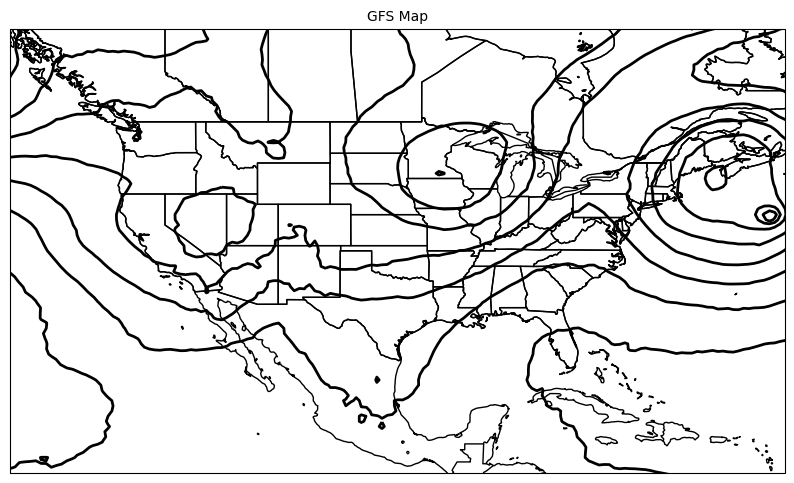

In [12]:
pc = PanelContainer()
pc.size = (10, 8)
pc.panels = [panel]
pc.show()

In [13]:
import metpy.calc as mpcalc

In [14]:
ds['Vorticity'] = mpcalc.vorticity(ds['u-component_of_wind_isobaric'], ds['v-component_of_wind_isobaric'])

In [15]:
ds

<xarray.Dataset>
Dimensions:                         (time: 1, latitude: 361, isobaric: 41,
                                     longitude: 720)
Coordinates:
    reftime                         (time) datetime64[ns] 2023-01-17
  * latitude                        (latitude) float32 90.0 89.5 ... -89.5 -90.0
  * time                            (time) datetime64[ns] 2023-01-17
  * isobaric                        (isobaric) float64 1.0 2.0 ... 1e+05
  * longitude                       (longitude) float32 0.0 0.5 ... 359.0 359.5
    metpy_crs                       object Projection: latitude_longitude
Data variables:
    u-component_of_wind_isobaric    (time, isobaric, latitude, longitude) float32 ...
    v-component_of_wind_isobaric    (time, isobaric, latitude, longitude) float32 ...
    Geopotential_height_isobaric    (time, isobaric, latitude, longitude) float32 ...
    LatLon_361X720-0p25S-180p00E-2  int32 ...
    Vorticity                       (time, isobaric, latitude, longitude) float64 <Quantity([[[[ 1.29848088e-05  2.12801105e-05  3.02657876e-05 ... -6.56179149e-06     -1.17687602e-06  1.27302808e-05]    [ 9.56896049e-03  1.13428005e-02  1.36957551e-02 ...  3.60356742e-03      5.06825046e-03  7.21599589e-03]    [-2.62611084e-05 -2.38632168e-05  2.82644523e-05 ... -3.19550283e-05     -2.95571337e-05 -2.68620892e-05]    ...    [-6.04699711e-05 -5.68722860e-05 -1.06001096e-04 ... -6.85612758e-05     -6.61625412e-05 -6.37654570e-05]    [-2.22865772e-01 -2.21089229e-01 -2.19520599e-01 ... -2.26480007e-01     -2.25013518e-01 -2.23650088e-01]    [ 2.69027472e-01  4.48886361e-01  4.48891749e-01 ...  4.48870748e-01      4.48876140e-01  6.28740294e-01]]    [[ 1.79667872e-01  1.79667436e-01  1.79679332e-01 ...  1.79640493e-01      1.79651490e-01  1.79663382e-01]    [-4.90650411e-02 -4.74973085e-02 -4.50413043e-02 ... -5.53404918e-02     -5.28835816e-02 -5.03254221e-02]    [ 2.14436147e-05  2.38440100e-05  2.53426112e-05 ... -3.78743917e-05     -3.51768459e-05  6.93784672e-05]    ...    [-7.65475825e-06 -5.25603291e-06 -1.95885241e-06 ... -1.72458112e-05      3.75797258e-05  1.43934452e-04]    [ 7.53843899e-03  9.10797567e-03  9.89319346e-03 ...  5.18368619e-03      5.96890398e-03  6.75412178e-03]    [ 2.80495718e-05  3.48968919e-05  3.66918646e-05 ...  2.32205585e-05      2.50155311e-05  2.68105038e-05]]    [[ 1.79568375e-01  1.79571066e-01  1.79575902e-01 ...  1.79557598e-01      1.79563886e-01  1.79562771e-01]    [-8.18628739e-02 -8.12855633e-02 -7.97169190e-02 ... -8.51032028e-02     -8.35354595e-02 -8.27502413e-02]    [ 4.51221647e-05 -5.67355880e-05 -5.55374914e-05 ... -6.27303172e-05     -6.24315048e-05  4.30214401e-05]    ...    [ 1.99058435e-04  9.84021144e-05  9.99007111e-05 ...  8.97089957e-05      9.12076009e-05 -1.03496688e-05]    [ 7.01538550e-02  7.11442786e-02  7.34972350e-02 ...  6.47666810e-02      6.72226886e-02  6.89974294e-02]    [-2.69561974e-01 -8.96999659e-02 -8.96909802e-02 ... -8.97200648e-02     -8.97110791e-02  9.01472505e-02]]    ...    [[ 1.52709953e-01  1.34725685e-01  1.25734227e-01 ...  1.34722636e-01      1.25730451e-01  1.25730168e-01]    [-4.82383227e-02 -4.80031148e-02 -4.77679113e-02 ... -4.89439362e-02     -4.87088227e-02 -4.84735253e-02]    [ 3.63400615e-06  3.81434585e-06  9.02709613e-06 ...  8.39761571e-06      3.30483645e-06  3.48445658e-06]    ...    [-1.90808323e-05  1.41063639e-06  1.15963193e-05 ...  6.95304698e-06      6.83310039e-06 -3.59252671e-06]    [ 1.44681571e-02  1.43897253e-02  1.43215990e-02 ...  1.47921006e-02      1.47137586e-02  1.46147157e-02]    [-4.49178201e-02 -2.69324680e-02 -1.79398357e-02 ... -1.79381292e-02     -1.79383073e-02 -1.79386677e-02]]    [[ 1.43680887e-01  1.43681605e-01  1.34688872e-01 ...  1.43677106e-01      1.43678188e-01  1.43679356e-01]    [-5.68301510e-02 -5.65948551e-02 -5.62914340e-02 ... -5.76927240e-02     -5.74574265e-02 -5.71437890e-02]    [ 1.97404631e-05  2.00401833e-05  1.50970536e-05 ...  1.92607407e-05      1.95606694e-05  1.96505612e-05

In [16]:
contour = ContourPlot()
contour.data = ds
contour.field = 'Geopotential_height_isobaric'
contour.level = 850 * units.hPa
contour.linecolor = 'black'
contour.contours = 30

In [17]:
from metpy.plots import RasterPlot

In [18]:
vor = RasterPlot()
vor.data = ds
vor.field = 'Vorticity'
vor.level = 850 * units.hPa
vor.scale = 1e5
vor.image_range = (-10, 10)
vor.colormap = 'coolwarm'

In [19]:
panel = MapPanel()
panel.area = (-135, -60, 15, 58)
panel.layers = ['coastline', 'borders', 'states']
panel.title = 'GFS Map'
panel.plots = [contour, vor]

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:402

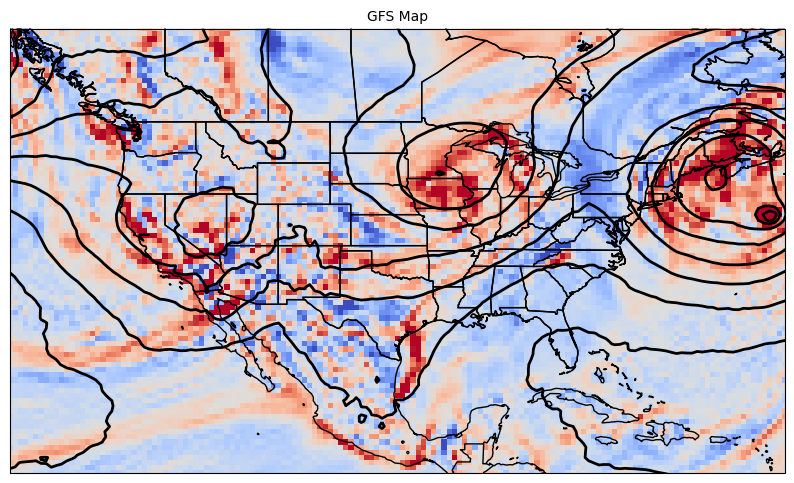

In [20]:
pc = PanelContainer()
pc.size = (10, 8)
pc.panels = [panel]
pc.show()